The codes presented below is a practise of how annonations can be used in general.

In [1]:
# Library used
library(ggplot2)

In [2]:
# options to set the dimension of every graph to 14 X 8
options(repr.plot.width = 14, repr.plot.height = 8)

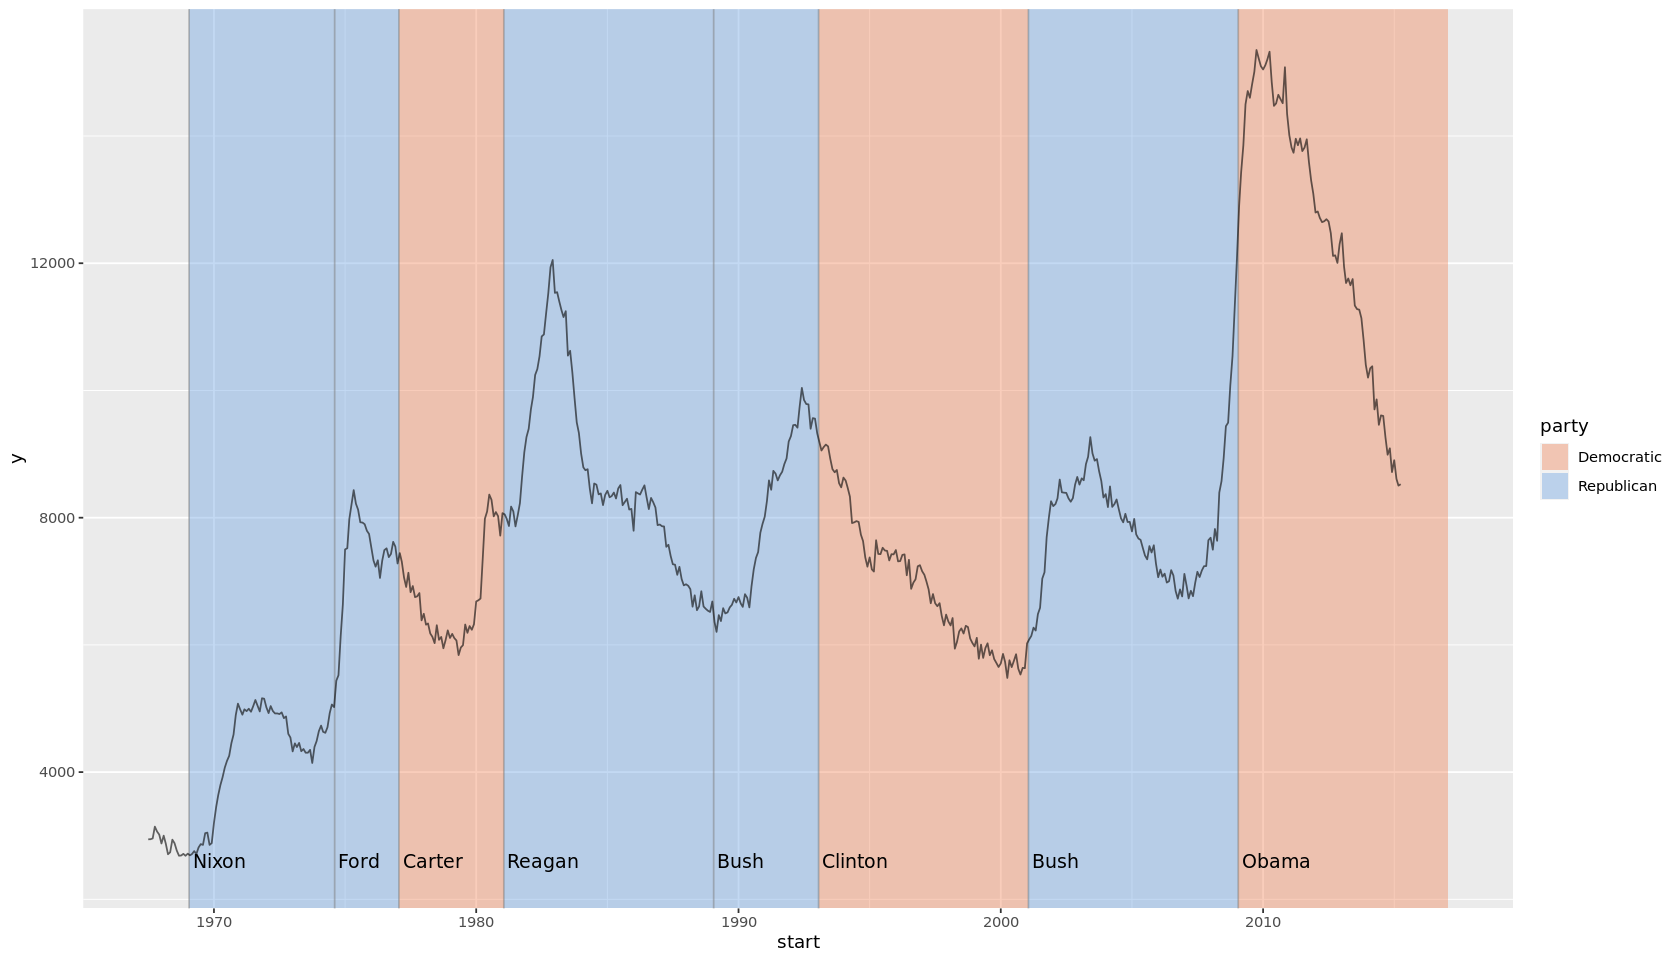

In [4]:
# Create a subest of presidential
presidential <- subset(presidential, start > economics$date[1])

ggplot(economics) + 
# geom to show the party varible with a colour profile
  geom_rect(
    aes(xmin = start, xmax = end, fill = party),
    ymin = -Inf, ymax = Inf, alpha = 0.4,
    data = presidential
  ) + 
# geom to set the boundary of the reign of each ruler
  geom_vline(
    aes(xintercept = as.numeric(start)), 
    data = presidential, 
    colour = "grey50", alpha = 0.5
  ) + 
# geom to add the names of the presidents
  geom_text(
    aes(x = start, y = 2500, label = name), 
    data = presidential,
    size = 4, vjust = 0, hjust = 0, nudge_x = 50
  ) + 
# geom to create a line plot
  geom_line(aes(date, unemploy), alpha = 0.6) + 
# function to set the background colors to alternate "#F08657" and "6AA1E2"
  scale_fill_manual(values = c("#F08357", "#6AA1E2")) 

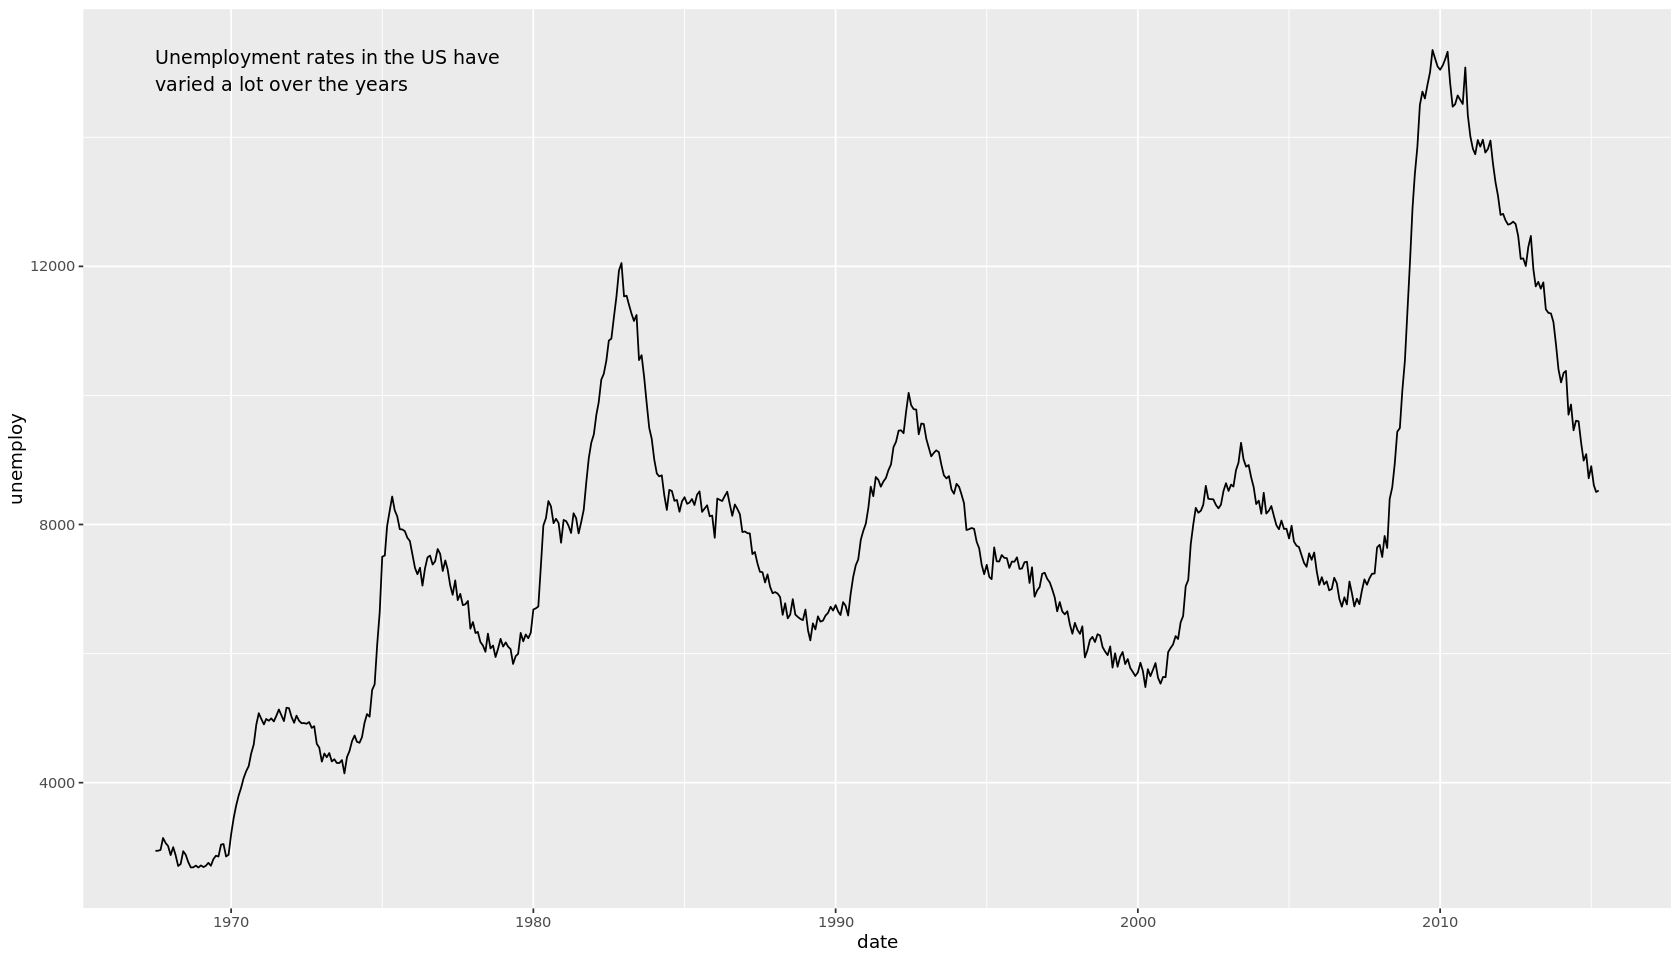

In [5]:
# Create range of the umemploy from economics dataset
yrng <- range(economics$unemploy)

# Create range of the date from economics dataset
xrng <- range(economics$date)

# Create a caption as listed below with max. 39 characters in a single row
caption <- paste(strwrap("Unemployment rates in the US have varied a lot over 
the years", 40), collapse = "\n")

ggplot(economics, aes(date, unemploy)) +
# geom to display the line plot of date vs unemploy
  geom_line() + 
# geom to add the caption
  geom_text(
    aes(x, y, label = caption), 
    data = data.frame(x = xrng[1], y = yrng[2], caption = caption), 
    hjust = 0, vjust = 1, size = 4
  )

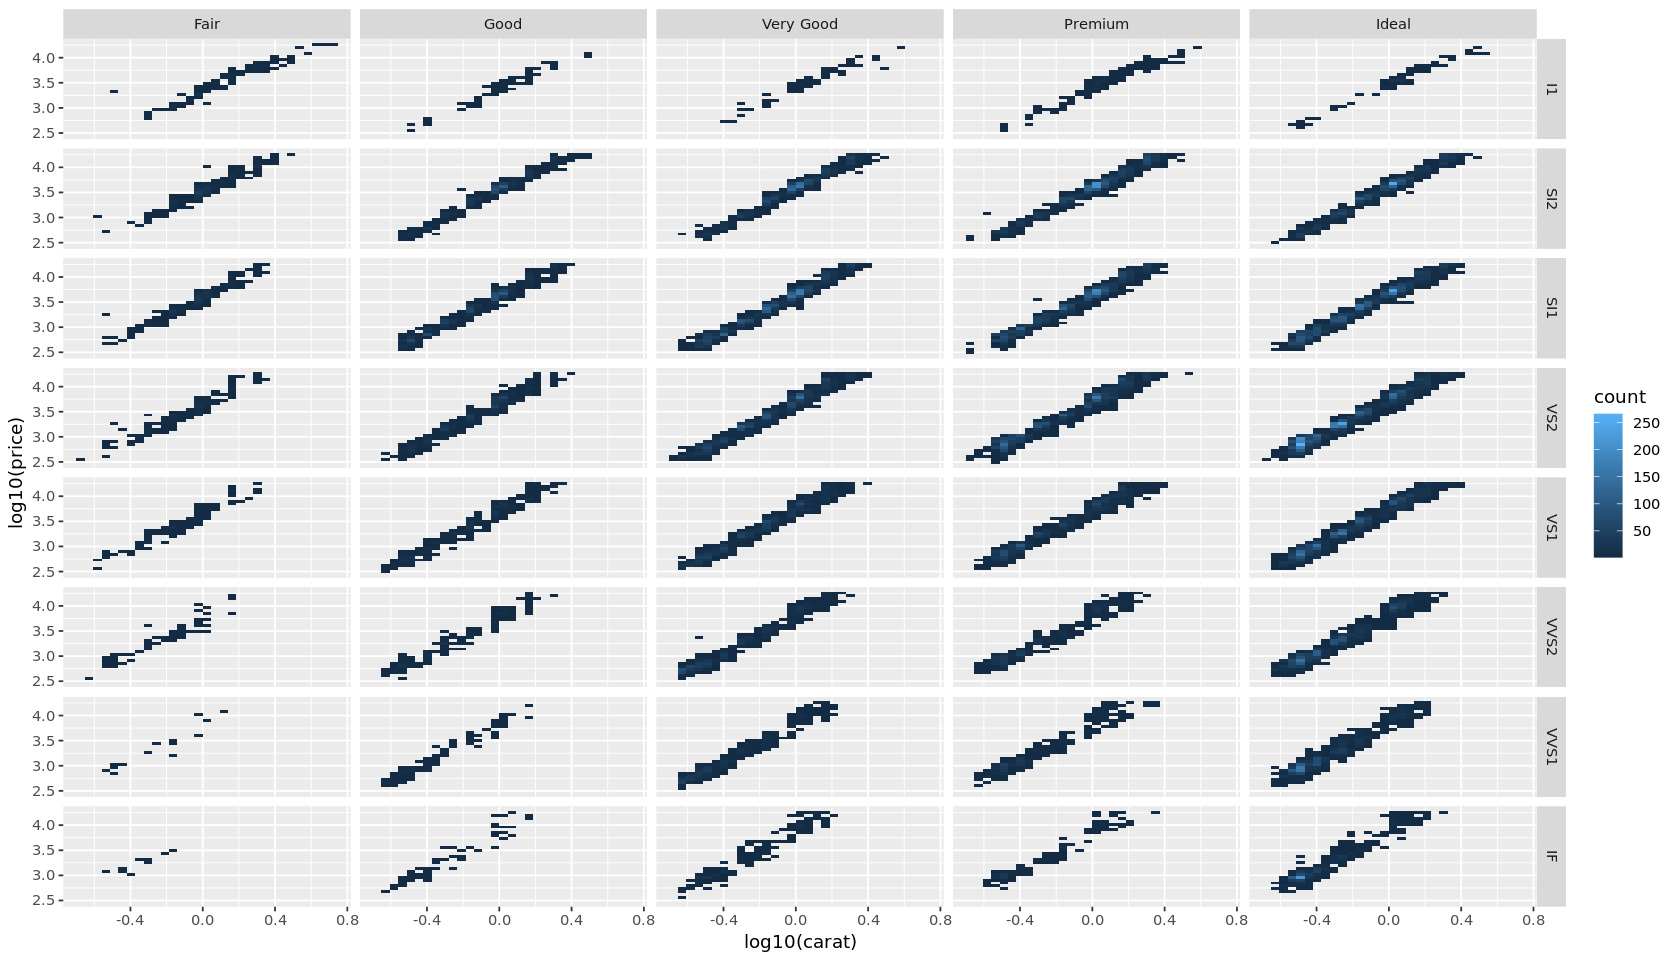

In [6]:
ggplot(diamonds, aes(log10(carat), log10(price))) + 
# geom to display continuous bivariate distribution 
  geom_bin2d() + 
# categorizes the plot with "clarity" in rows and "cut" in columns
  facet_grid(clarity~cut)

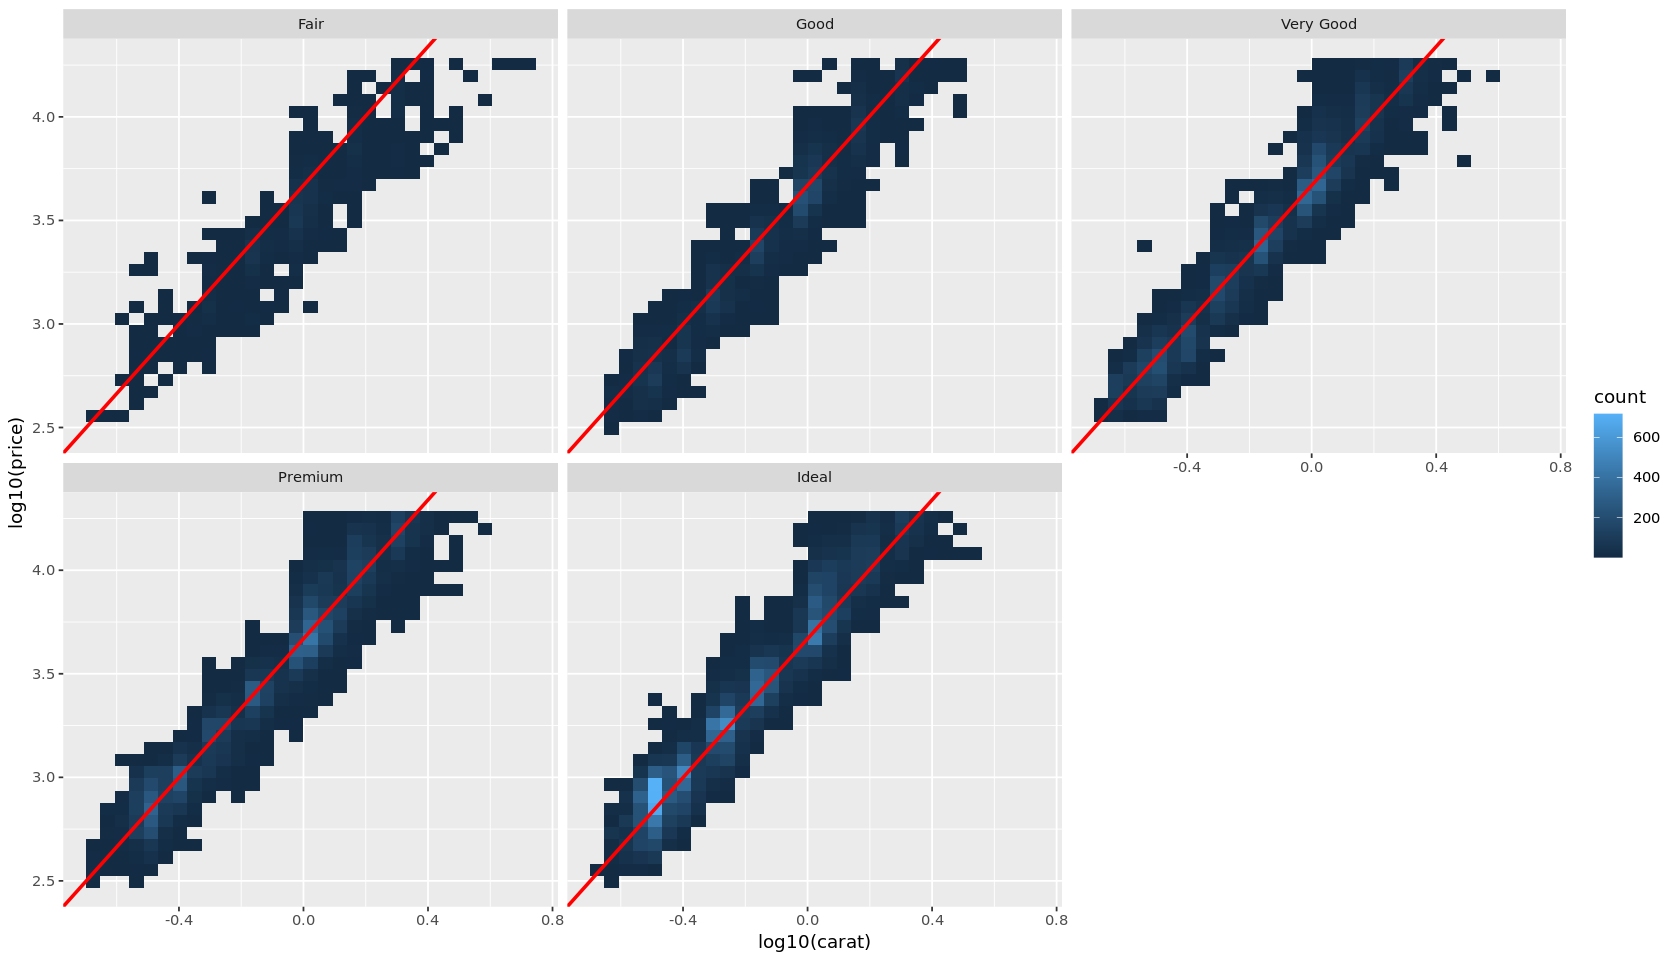

In [8]:
# Create a object containing intercept and slope as defined by linear model of log10(price)~log10(carat) from "diamonds" dataset.
mod_coef <- coef(lm(log10(price) ~ log10(carat), data = diamonds))
ggplot(diamonds, aes(log10(carat), log10(price))) + 
# geom to display continuous bivariate distribution
  geom_bin2d() + 
# geom to add a straght line with intecept and slope as defined in "mod_coef" object
  geom_abline(intercept = mod_coef[1], slope = mod_coef[2],
              color = "red", 
              size = 1
              ) + 
  facet_wrap(~cut, nrow = 2) 